In [1]:
import numpy as np

def softmax(logits):
    exponentials = np.exp(logits)
    return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)

In [2]:
def ReLU(x):
    return np.maximum(0, x)

In [3]:
def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

In [4]:
X = np.zeros((5, 5, 5))
    
X[0, :, :] = [[0,1,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,1,1,1,0]]
    
X[1, :, :] = [[1,1,1,1,0],
              [0,0,0,0,1],
              [0,1,1,1,0],
              [1,0,0,0,0],
              [1,1,1,1,1]]
    
X[2, :, :] = [[1,1,1,1,0],
              [0,0,0,0,1],
              [0,1,1,1,0],
              [0,0,0,0,1],
              [1,1,1,1,0]]
    
X[3, :, :] = [[0,0,0,1,0],
              [0,0,1,1,0],
              [0,1,0,1,0],
              [1,1,1,1,1],
              [0,0,0,1,0]]
    
X[4, :, :] = [[1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,0],
              [0,0,0,0,1],
              [1,1,1,1,0]]
    
Y = np.array([[1,0,0,0,0],
              [0,1,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1]])

Y_test = np.array([[0],[1],[2],[3],[4]])

x1  = np.reshape(X[0, :, :], (1, 25))
x2  = np.reshape(X[1, :, :], (1, 25))
x3  = np.reshape(X[2, :, :], (1, 25))
x4  = np.reshape(X[3, :, :], (1, 25))
x5  = np.reshape(X[4, :, :], (1, 25))

In [12]:
x1_test = x1
x1_test[0,3]=1
print(x1_test)
x2_test = x2
x2_test[0,16]=1
print(x2_test)
x3_test = x3
x3_test[0,8]=1
print(x3_test)
x4_test = x4
x4_test[0,22]=1
print(x4_test)
x5_test = x5
x5_test[0,24]=1
print(x5_test)

[[0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
  0.]]
[[1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
  1.]]
[[1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  0.]]
[[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
  0.]]
[[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  1.]]


In [13]:
print(Y.shape)
X = np.row_stack((x1, x2, x3, x4, x5))
X_test = np.row_stack((x1_test, x2_test, x3_test, x4_test, x5_test))
print(X)
print(X.shape)

(5, 5)
[[0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
  0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
  0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  1.]]
(5, 25)


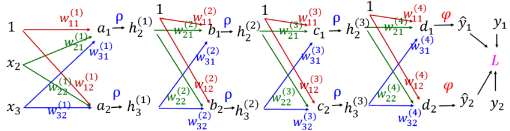

In [20]:
def forward(X, w1, w2, w3, w4):
    a  = np.matmul(prepend_bias(X), w1)     # (5 x 26) x (26 x 20) = 5 x 20
    h1 = ReLU(a)                            # 5 x 20
    b  = np.matmul(prepend_bias(h1), w2)    # (5 x 21) x (21 x 20) = 5 x 20
    h2 = ReLU(b)                            # 5 x 20
    c  = np.matmul(prepend_bias(h2), w3)    # (5 x 21) x (21 x 20) = 5 x 20
    h3 = ReLU(c)                            # 5 x 20
    d  = np.matmul(prepend_bias(h3), w4)    # (5 x 21) x (21 x 20) = 5 x 20
    y_hat = softmax(d)
    return (y_hat, d, h3, c, h2, b, h1, a)

In [21]:
def loss(Y, y_hat):
    return -np.sum(Y * np.log(y_hat)) / Y.shape[0]

In [22]:
def back(X, Y, y_hat, w1, w2, w3, w4, a, b, c, d, h1, h2, h3):
    dw4 = np.matmul(prepend_bias(h3).T, y_hat-Y)/X.shape[0] # (21 x 5) x (5 x 5)  = 21 x 5
    dh3 = np.matmul(y_hat - Y, w4[1:].T)                    # (5 x 5)  x (5 x 20) = 5  x 20
    dc  = dh3 * (h3 > 0)                                    # (5 x 20) * (5 x 20) = 5  x 20
    dw3 = np.matmul(prepend_bias(h2).T, dc)/X.shape[0]      # (21 x 5) x (5 x 20) = 21 x 20
    dh2 = np.matmul(dc, w3[1:].T)                           # (5 x 20) x (20 x 20)= 5  x 20
    db  = dh2 * (h2 > 0)                                    # (5 x 20) * (5 x 20) = 5  x 20
    dw2 = np.matmul(prepend_bias(h1).T, db)/X.shape[0]      # (21 x 5) x (5 x 20) = 21 x 20
    dh1 = np.matmul(db, w2[1:].T)                           # (5 x 20) x (20 x 20)= 5  x 20
    da  = dh1 * (h1 > 0)                                    # (5 x 20) x (20 x 20)= 5  x 20
    dw1 = np.matmul(prepend_bias(X).T, da)/X.shape[0]       # (26 x 5) x (5  x 20)= 26 x 20    
    return (dw1, dw2, dw3, dw4)

In [23]:
def classify(X, w1, w2, w3, w4):
    y_hat,  _, _, _, _, _, _, _ = forward(X, w1, w2, w3, w4)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

In [24]:
def report(iteration, X_train, Y_train, X_test, Y_test, w1, w2, w3, w4):
    y_hat, _, _, _, _, _, _, _ = forward(X, w1, w2, w3, w4)
    training_loss = loss(Y_train, y_hat)
    classifications = classify(X, w1, w2, w3, w4)
    accuracy = np.average(classifications == Y_test) * 100.0
    if iteration % 1 == 0:
        print("Iteration: %5d, Loss: %.8f, Accuracy: %.2f%%" %
              (iteration, training_loss, accuracy))

In [25]:
def train(X_train, Y_train, X_test, Y_test, iterations, lr):
    W1 = 2*np.random.random((26, 20)) - 1
    W2 = 2*np.random.random((21, 20)) - 1
    W3 = 2*np.random.random((21, 20)) - 1
    W4 = 2*np.random.random((21, 5)) - 1
    for iteration in range(iterations):
        y_hat, d, h3, c, h2, b, h1, a = forward(X, W1, W2, W3, W4)
        dW1, dW2, dW3, dW4 = back(X, Y, y_hat, W1, W2, W3, W4, a, b, c, d, h1, h2, h3)
        W1 = W1 - (dW1 * lr)
        W2 = W2 - (dW2 * lr)
        W3 = W3 - (dW3 * lr)
        W4 = W4 - (dW4 * lr)
        report(iteration, X_train, Y_train, X_test, Y_test, W1, W2, W3, W4)
    return (W1, W2, W3, W4)

In [26]:
W1, W2, W3, W4 = train(X, Y, X_test, Y_test, iterations=20, lr=0.1)

Iteration:     0, Loss: 10.22826812, Accuracy: 0.00%
Iteration:     1, Loss: 4.44558521, Accuracy: 40.00%
Iteration:     2, Loss: 6.65518938, Accuracy: 20.00%
Iteration:     3, Loss: 2.79795670, Accuracy: 40.00%
Iteration:     4, Loss: 1.09650296, Accuracy: 40.00%
Iteration:     5, Loss: 0.58983476, Accuracy: 80.00%
Iteration:     6, Loss: 0.32890743, Accuracy: 100.00%
Iteration:     7, Loss: 0.18281554, Accuracy: 100.00%
Iteration:     8, Loss: 0.11830762, Accuracy: 100.00%
Iteration:     9, Loss: 0.09143780, Accuracy: 100.00%
Iteration:    10, Loss: 0.07762404, Accuracy: 100.00%
Iteration:    11, Loss: 0.06747633, Accuracy: 100.00%
Iteration:    12, Loss: 0.05960686, Accuracy: 100.00%
Iteration:    13, Loss: 0.05372151, Accuracy: 100.00%
Iteration:    14, Loss: 0.04852485, Accuracy: 100.00%
Iteration:    15, Loss: 0.04424460, Accuracy: 100.00%
Iteration:    16, Loss: 0.04067881, Accuracy: 100.00%
Iteration:    17, Loss: 0.03751690, Accuracy: 100.00%
Iteration:    18, Loss: 0.03470786

In [27]:
Y_hat, d, H3, c, H2, b, H1, a = forward(X, W1, W2, W3, W4)
print(Y_hat)

[[9.61910188e-01 1.23905484e-02 2.29608453e-02 2.68117045e-03
  5.72476544e-05]
 [1.41602071e-04 9.80287326e-01 1.38846960e-02 3.22383613e-03
  2.46253934e-03]
 [3.68553397e-02 8.26537422e-03 9.46614387e-01 6.89503927e-03
  1.36985944e-03]
 [7.11512979e-05 2.78989192e-03 3.24520818e-03 9.81279197e-01
  1.26145511e-02]
 [9.68982238e-04 1.28364612e-02 7.68051922e-03 7.54070231e-03
  9.70973335e-01]]


In [28]:
classifications=classify(X_test, W1, W2, W3, W4)
print(classifications)

[[0]
 [1]
 [2]
 [3]
 [4]]


## 以下activation function 是使用  sigmoid, 在 forward 中加入 dropout

In [40]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Dropout(y, ratio):
    yd = np.zeros(y.size)    
    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    yd[idx] = 1.0 / (1.0 - ratio)
    yd=np.reshape(yd,(y.shape))   
    return yd

In [5]:
ratio=0.2
h1 = np.random.random((2, 3))
print(h1)
yd = np.zeros(h1.size)
print('yd=',yd)
num = round(h1.size*(1-ratio))
print(f'h1.size={h1.size}, num={num}')
idx = np.random.choice(h1.size, num, replace=False)
print('idx=',idx)
yd[idx]= 1.0 / (1.0 - ratio)
print('yd =',yd)
yd=np.reshape(yd,(h1.shape))
print('yd =',yd)

[[0.04806826 0.43194944 0.98873132]
 [0.30957655 0.98688492 0.77138021]]
yd= [0. 0. 0. 0. 0. 0.]
h1.size=6, num=5
idx= [5 1 2 3 4]
yd = [0.   1.25 1.25 1.25 1.25 1.25]
yd = [[0.   1.25 1.25]
 [1.25 1.25 1.25]]


In [6]:
h1 = np.random.random((2, 3))
ratio=0.2
p = 1-ratio
print(h1)
u1 = np.random.binomial(1, p, size=h1.shape)/p
print(u1)
h1= h1 * u1
print(h1)

[[0.89878621 0.41656776 0.03571064]
 [0.21469685 0.11368745 0.85213748]]
[[0.   1.25 1.25]
 [1.25 1.25 1.25]]
[[0.         0.5207097  0.04463829]
 [0.26837106 0.14210931 1.06517185]]


In [32]:
def forward_dropout(X, w1, w2, w3, w4):
    a  = np.matmul(prepend_bias(X), w1)     # (5 x 26) x (26 x 20) = 5 x 20
    h1 = sigmoid(a)                         # 5 x 20
    h1 = h1 * Dropout(h1, 0.2)
    b  = np.matmul(prepend_bias(h1), w2)    # (5 x 21) x (21 x 20) = 5 x 20
    h2 = sigmoid(b)                         # 5 x 20
    h2 = h2 * Dropout(h2, 0.2)
    c  = np.matmul(prepend_bias(h2), w3)    # (5 x 21) x (21 x 20) = 5 x 20
    h3 = sigmoid(c)                         # 5 x 20
    h3 = h3 * Dropout(h3, 0.2)
    d  = np.matmul(prepend_bias(h3), w4)    # (5 x 21) x (21 x 20) = 5 x 20
    y_hat = softmax(d)
    return (y_hat, d, h3, c, h2, b, h1, a)

In [33]:
def back_sigmoid(X, Y, y_hat, w1, w2, w3, w4, a, b, c, d, h1, h2, h3):
    dw4 = np.matmul(prepend_bias(h3).T, y_hat-Y)/X.shape[0]     # (21 x 5) x (5 x 5)  = 21 x 5
    dh3 = np.matmul(y_hat - Y, w4[1:].T)                        # (5 x 5)  x (5 x 20) = 5  x 20
    dc  = dh3 * sigmoid(h3) * (1-sigmoid(h3))                   # (5 x 20) * (5 x 20) = 5  x 20
    dw3 = np.matmul(prepend_bias(h2).T, dc)/X.shape[0]          # (21 x 5) x (5 x 20) = 21 x 20
    dh2 = np.matmul(dc, w3[1:].T)                               # (5 x 20) x (20 x 20)= 5  x 20
    db  = dh2 * sigmoid(h2) * (1-sigmoid(h2))                   # (5 x 20) * (5 x 20) = 5  x 20
    dw2 = np.matmul(prepend_bias(h1).T, db)/X.shape[0]          # (21 x 5) x (5 x 20) = 21 x 20
    dh1 = np.matmul(db, w2[1:].T)                               # (5 x 20) x (20 x 20)= 5  x 20
    da  = dh1 * sigmoid(h1) * (1-sigmoid(h1))                   # (5 x 20) x (20 x 20)= 5  x 20
    dw1 = np.matmul(prepend_bias(X).T, da)/X.shape[0]           # (26 x 5) x (5  x 20)= 26 x 20    
    return (dw1, dw2, dw3, dw4)

In [34]:
def classify_dropout(X, w1, w2, w3, w4):
    y_hat,  _, _, _, _, _, _, _ = forward_dropout(X, w1, w2, w3, w4)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

In [35]:
def report_dropout(iteration, X_train, Y_train, X_test, Y_test, w1, w2, w3, w4):
    y_hat, _, _, _, _, _, _, _ = forward_dropout(X, w1, w2, w3, w4)
    training_loss = loss(Y_train, y_hat)
    classifications = classify_dropout(X, w1, w2, w3, w4)
    accuracy = np.average(classifications == Y_test) * 100.0
    if iteration % 200 == 0:
        print("Iteration: %5d, Loss: %.8f, Accuracy: %.2f%%" %
              (iteration, training_loss, accuracy))

In [36]:
def train_dropout(X_train, Y_train, X_test, Y_test, iterations, lr):
    W1 = 2*np.random.random((26, 20)) - 1
    W2 = 2*np.random.random((21, 20)) - 1
    W3 = 2*np.random.random((21, 20)) - 1
    W4 = 2*np.random.random((21, 5)) - 1
    for iteration in range(iterations):
        y_hat, d, h3, c, h2, b, h1, a = forward_dropout(X, W1, W2, W3, W4)
        dW1, dW2, dW3, dW4 = back_sigmoid(X, Y, y_hat, W1, W2, W3, W4, a, b, c, d, h1, h2, h3)
        W1 = W1 - (dW1 * lr)
        W2 = W2 - (dW2 * lr)
        W3 = W3 - (dW3 * lr)
        W4 = W4 - (dW4 * lr)
        report_dropout(iteration, X_train, Y_train, X_test, Y_test, W1, W2, W3, W4)
    return (W1, W2, W3, W4)

In [37]:
W1, W2, W3, W4 = train_dropout(X, Y, X_test, Y_test, iterations=20000, lr=0.1)

Iteration:     0, Loss: 2.35408731, Accuracy: 0.00%
Iteration:   200, Loss: 1.27025888, Accuracy: 60.00%
Iteration:   400, Loss: 1.05682895, Accuracy: 80.00%
Iteration:   600, Loss: 0.28166825, Accuracy: 60.00%
Iteration:   800, Loss: 0.45380327, Accuracy: 100.00%
Iteration:  1000, Loss: 0.13770114, Accuracy: 100.00%
Iteration:  1200, Loss: 0.09434214, Accuracy: 100.00%
Iteration:  1400, Loss: 0.23253950, Accuracy: 100.00%
Iteration:  1600, Loss: 0.04399648, Accuracy: 80.00%
Iteration:  1800, Loss: 0.31370021, Accuracy: 60.00%
Iteration:  2000, Loss: 0.18359792, Accuracy: 100.00%
Iteration:  2200, Loss: 0.13155510, Accuracy: 80.00%
Iteration:  2400, Loss: 0.15843733, Accuracy: 100.00%
Iteration:  2600, Loss: 0.07020637, Accuracy: 100.00%
Iteration:  2800, Loss: 0.02778894, Accuracy: 80.00%
Iteration:  3000, Loss: 0.15672779, Accuracy: 80.00%


<ipython-input-29-83cc1282dfca>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration:  3200, Loss: 0.09056295, Accuracy: 80.00%
Iteration:  3400, Loss: 0.45713103, Accuracy: 100.00%
Iteration:  3600, Loss: 0.85477712, Accuracy: 100.00%
Iteration:  3800, Loss: 0.34324435, Accuracy: 100.00%
Iteration:  4000, Loss: 0.08151749, Accuracy: 100.00%
Iteration:  4200, Loss: 0.38178813, Accuracy: 100.00%
Iteration:  4400, Loss: 0.56676252, Accuracy: 80.00%
Iteration:  4600, Loss: 0.03053799, Accuracy: 80.00%
Iteration:  4800, Loss: 0.80710193, Accuracy: 100.00%
Iteration:  5000, Loss: 0.61320283, Accuracy: 80.00%
Iteration:  5200, Loss: 0.74083502, Accuracy: 100.00%
Iteration:  5400, Loss: 0.07591908, Accuracy: 80.00%
Iteration:  5600, Loss: 0.11316457, Accuracy: 80.00%
Iteration:  5800, Loss: 0.45216351, Accuracy: 100.00%
Iteration:  6000, Loss: 0.55055329, Accuracy: 80.00%
Iteration:  6200, Loss: 0.21240654, Accuracy: 100.00%
Iteration:  6400, Loss: 0.48345373, Accuracy: 100.00%
Iteration:  6600, Loss: 0.13695806, Accuracy: 100.00%
Iteration:  6800, Loss: 0.04309458,

In [38]:
Y_hat, d, H3, c, H2, b, H1, a = forward_dropout(X, W1, W2, W3, W4)
print(Y_hat)

[[9.99912337e-01 1.27388597e-06 8.63858352e-05 4.57272272e-10
  2.54053564e-09]
 [1.40130094e-04 9.55045020e-01 2.74977328e-02 1.14869106e-03
  1.61684259e-02]
 [1.68673794e-05 6.04480173e-02 9.38821372e-01 3.89315919e-09
  7.13739562e-04]
 [4.79914521e-07 3.10456270e-06 4.47495709e-08 9.99992414e-01
  3.95636311e-06]
 [3.35710871e-06 2.56044275e-06 7.37410958e-07 6.04672215e-01
  3.95321130e-01]]


<ipython-input-29-83cc1282dfca>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [39]:
classifications=classify_dropout(X_test, W1, W2, W3, W4)
print(classifications)

[[0]
 [1]
 [2]
 [3]
 [4]]


<ipython-input-29-83cc1282dfca>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
